In [20]:
import pandas as pd

In [25]:
# from Baseball Savant, get get speed using TY and LY data
# min pa = 50
def read_ps(year):
    df = pd.read_csv(f'Pitch Speed {year - 1}-{year}.csv', index_col=False).drop('Unnamed: 13', axis=1).fillna(0)
    
    df['FF_SPD'] = df['ff_avg_speed'] + df['ff_range_speed']
    df['SI_SPD'] = df['si_avg_speed'] + df['si_range_speed']
    df['FC_SPD'] = df['fc_avg_speed'] + df['fc_range_speed']
    df['Top Speed'] = df.apply(lambda x: max(x['FF_SPD'], x['SI_SPD'], x['FC_SPD']), axis=1)
                
    # for LY data, give it half-weight
    df.loc[df['year'] < year, 'p_formatted_ip'] /= 2
    
    # calculate the weighted launch angle
    df['Weight'] = df['p_formatted_ip'] * df['Top Speed']
    df_grouped = df.groupby(['player_id']).sum()
    df_grouped['Top Speed'] = df_grouped['Weight'] / df_grouped['p_formatted_ip']
    df_grouped = df_grouped[df_grouped['year'] >= year]
    
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['MLBID', 'PLAYERNAME']].set_index('MLBID')
    merge = df_grouped[['Top Speed']].merge(player_map, how='left', left_index=True, right_index=True)[['PLAYERNAME', 'Top Speed']]
    
#     mean = merge['FPS%'].mean()
#     std = merge['FPS%'].std()
    
#     merge['Z'] = (merge['FPS%'] - mean) / std
    
    merge['Top Speed'] = round(merge['Top Speed'])
    
    return merge

ps_data = read_ps(2022)
ps_data.head()

,PLAYERNAME,Top Speed
425794,Adam Wainwright,90.0
425844,Zack Greinke,91.0
434378,Justin Verlander,96.0
434671,Anibal Sanchez,91.0
445276,Kenley Jansen,95.0


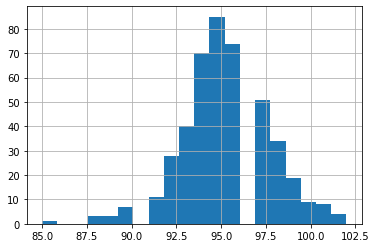

In [26]:
hist = ps_data['Top Speed'].hist(bins=20)

In [17]:
ps_data.sort_values('Top Speed')

,PLAYERNAME,Top Speed
502085,David Robertson,0.0
476595,Lucas Luetge,35.0
643511,Tyler Rogers,85.0
543294,Kyle Hendricks,88.0
643256,Adam Cimber,88.0
...,...,...
621237,Jose Alvarado,101.0
662253,Andres Munoz,102.0
547973,Aroldis Chapman,102.0
661395,Jhoan Duran,102.0


In [27]:
ps_data.to_csv('2022_Top_Speed.csv')